# Julia -- Modern Open Source Technical Computing System

## (like a combination of Python, MATLAB, and LISP)

###  <a href="http://julialang.org"><tt> JuliaLang.org </tt></a>

# Demystifying Digital Filtering
## Linear Time Invarient 

  <img src="LTI.png">

<img src="IIR.png">

## FIR - Finite Impulse Response, only b coeff (non-recursive) 

In [3]:
using PyPlot
using DSP 
using FFTW 
display("text/html", "<style>.container { width:100% !important; }</style>")

In [4]:
function naive_filter(b,x)
    N = length(x)
    M = length(b)
    y = zeros(N)

    for n=M:N
        for k=0:(M-1)
            y[n] = y[n] + (b[k+1] * x[n-k])
        end
    end
 
    return y 
end


naive_filter (generic function with 1 method)

In [5]:
f_samp = 48e3
dt = 1 / f_samp
N = 5000
n = collect(0:(N-1))
x1 = sin.(2 * pi * 20 * n ./ f_samp)
x2 = sin.(2 * pi * 5000 * n ./ f_samp)
x = x1 + x2;


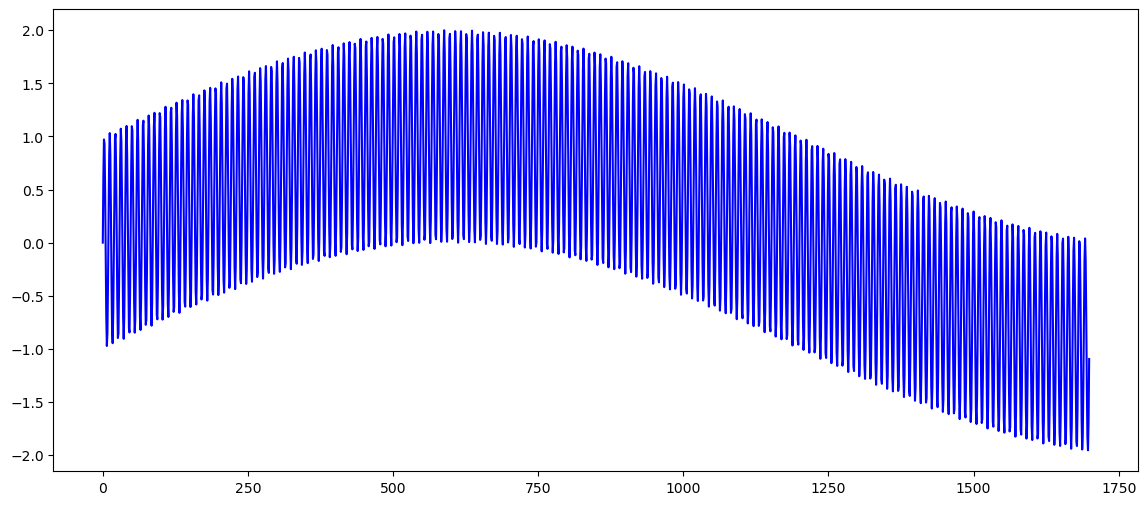

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14745ffd97f0>

In [16]:
fig = figure("Title of Window",figsize=(14,6))
plot(x[1:1700],"-b")

## moving average FIR filter (lowpass!) 

# $y[n] = \frac{x[n] + x[n-1] + x[n-2] ...}{10} $

In [9]:
b = ones(10) / 10
a = zeros(5)
a[1] = 1


1

In [10]:
ynf = naive_filter(b,x);

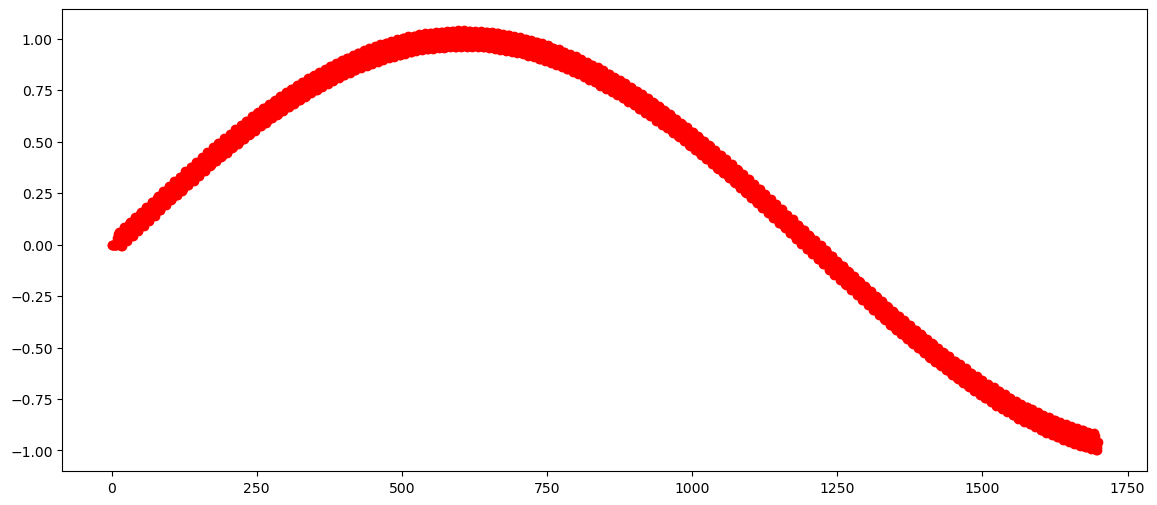

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14745ffaef70>

In [17]:
fig = figure("Title of Window",figsize=(14,6))
##plot(x[1:1700],"-b")
plot(ynf[1:1700],"or")


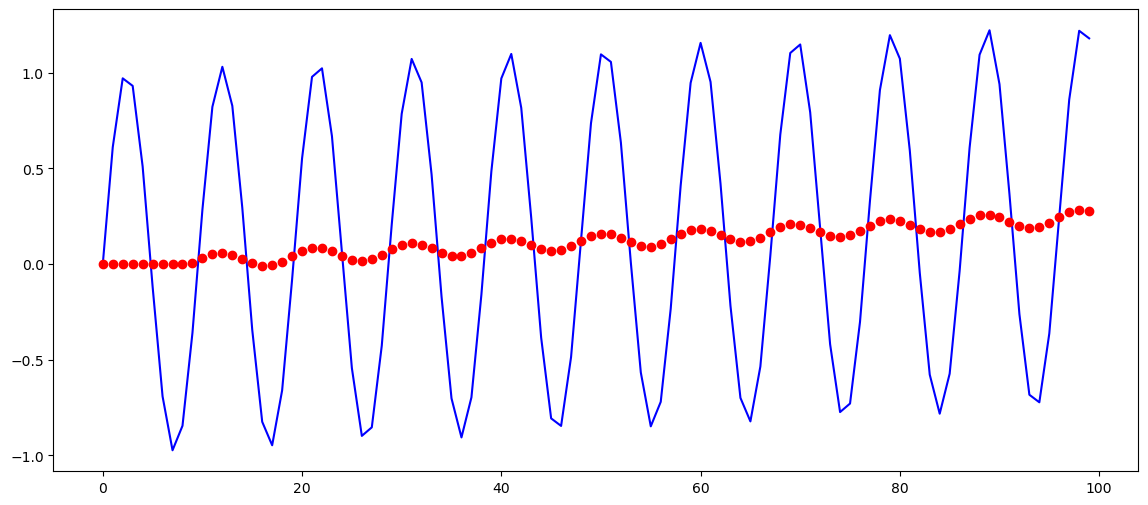

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14745fee03d0>

In [19]:
fig = figure("Title of Window",figsize=(14,6))
plot(x[1:100],"-b")
plot(ynf[1:100],"or")

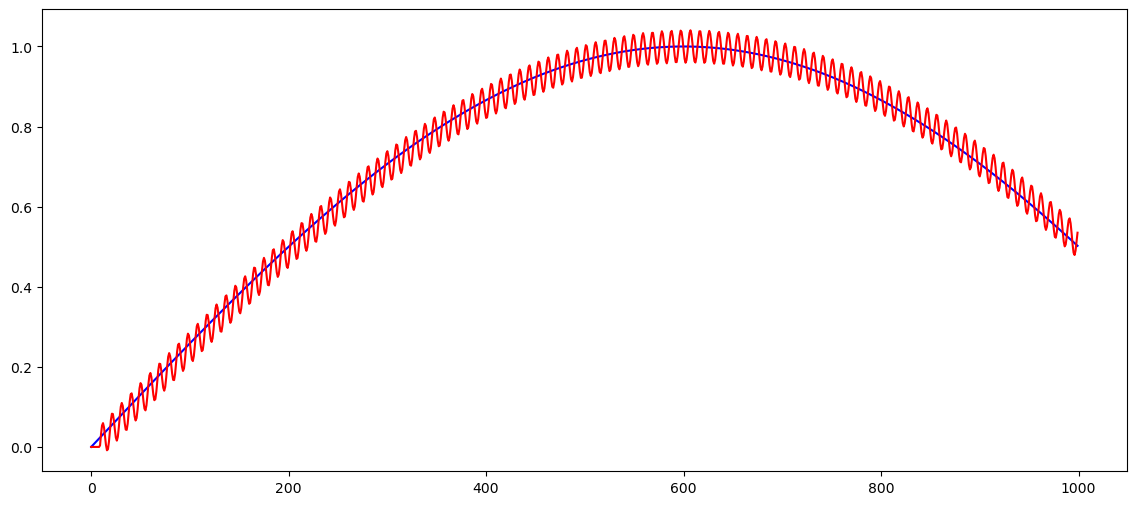

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14745fe10160>

In [21]:
fig = figure("Title of Window",figsize=(14,6))
plot(x1[1:1000],"-b")
plot(ynf[1:1000],"-r")

## Lets check our work with DSP.jl (Julia DSP package)

In [22]:
y = filt(b,a,x); ## DSP.jl build in filter function 

In [23]:
CHECK = zeros(20,4)
CHECK[:,1] = y[21:40]
CHECK[:,2] = ynf[21:40];
CHECK

20×4 Matrix{Float64}:
 0.0673405  0.0673405  0.0  0.0
 0.0830088  0.0830088  0.0  0.0
 0.0822167  0.0822167  0.0  0.0
 0.0663725  0.0663725  0.0  0.0
 0.0431053  0.0431053  0.0  0.0
 0.0231118  0.0231118  0.0  0.0
 0.0157357  0.0157357  0.0  0.0
 0.0251058  0.0251058  0.0  0.0
 0.0484297  0.0484297  0.0  0.0
 0.0771477  0.0771477  0.0  0.0
 0.100471   0.100471   0.0  0.0
 0.109839   0.109839   0.0  0.0
 0.10246    0.10246    0.0  0.0
 0.0824635  0.0824635  0.0  0.0
 0.059192   0.059192   0.0  0.0
 0.0433426  0.0433426  0.0  0.0
 0.0425445  0.0425445  0.0  0.0
 0.0582059  0.0582059  0.0  0.0
 0.0849321  0.0849321  0.0  0.0
 0.112755   0.112755   0.0  0.0

In [24]:
CHECK[:,1] - CHECK[:,2]

20-element Vector{Float64}:
 -2.7755575615628914e-17
 -1.3877787807814457e-17
  2.7755575615628914e-17
  2.7755575615628914e-17
  6.938893903907228e-18
 -4.85722573273506e-17
  0.0
 -1.3877787807814457e-17
 -2.7755575615628914e-17
  1.3877787807814457e-17
 -2.7755575615628914e-17
 -1.3877787807814457e-17
  1.3877787807814457e-17
  4.163336342344337e-17
  4.163336342344337e-17
  2.7755575615628914e-17
 -1.3877787807814457e-17
 -4.163336342344337e-17
  0.0
 -5.551115123125783e-17

# Impulse Response, Convolution, and FFT

<img src="LTI_hconv.png">

# the impulse response h COMPLETELY specifies a LTI filter 

# Convolution in time-domain = multiplication in Fourier (frequency) Domain

# FFT - Fast Fourier Transform.  

<img src="FFTpseudo.png">

In [26]:
function naive_convolution(b,x)

    L = length(x)
    P = length(b)

    y = zeros(L+P-1)
    xp = zeros(L+P-1)
    hp = zeros(L+P-1)
    
    xp[1:L] = x
    xp[L+1:L+P-1] .= 0

    hp[1:P] = b
    hp[P+1:L+P-1] .= 0

    X = fft(xp)
    H = fft(hp)
    Y = X .* H
    y = ifft(Y)

    return(real(y))
    

end


naive_convolution (generic function with 1 method)

In [29]:
ync = naive_convolution(b,x);

## lets check work with julia DSP conv() function 

In [30]:
yc = conv(b,x);

In [31]:
CHECK[:,3] = ync[21:40]
CHECK[:,4] = yc[21:40]
CHECK


20×4 Matrix{Float64}:
 0.0673405  0.0673405  0.0673405  0.0673405
 0.0830088  0.0830088  0.0830088  0.0830088
 0.0822167  0.0822167  0.0822167  0.0822167
 0.0663725  0.0663725  0.0663725  0.0663725
 0.0431053  0.0431053  0.0431053  0.0431053
 0.0231118  0.0231118  0.0231118  0.0231118
 0.0157357  0.0157357  0.0157357  0.0157357
 0.0251058  0.0251058  0.0251058  0.0251058
 0.0484297  0.0484297  0.0484297  0.0484297
 0.0771477  0.0771477  0.0771477  0.0771477
 0.100471   0.100471   0.100471   0.100471
 0.109839   0.109839   0.109839   0.109839
 0.10246    0.10246    0.10246    0.10246
 0.0824635  0.0824635  0.0824635  0.0824635
 0.059192   0.059192   0.059192   0.059192
 0.0433426  0.0433426  0.0433426  0.0433426
 0.0425445  0.0425445  0.0425445  0.0425445
 0.0582059  0.0582059  0.0582059  0.0582059
 0.0849321  0.0849321  0.0849321  0.0849321
 0.112755   0.112755   0.112755   0.112755

In [33]:
CHECK[:,1] - CHECK[:,4]

20-element Vector{Float64}:
 -1.1102230246251565e-16
 -2.7755575615628914e-17
 -2.7755575615628914e-17
 -2.7755575615628914e-17
  1.3877787807814457e-17
  6.938893903907228e-18
  4.163336342344337e-17
 -2.7755575615628914e-17
 -1.249000902703301e-16
 -8.326672684688674e-17
 -1.1102230246251565e-16
 -8.326672684688674e-17
 -4.163336342344337e-17
  0.0
  3.469446951953614e-17
 -5.551115123125783e-17
 -9.71445146547012e-17
 -1.457167719820518e-16
 -6.938893903907228e-17
 -1.1102230246251565e-16

In [34]:
20 .* log10.(abs.(CHECK[:,3] .- CHECK[:,4]))

20-element Vector{Float64}:
 -321.59057013598607
 -309.1947949702182
 -323.1741950569386
 -310.7092092489805
 -318.5652166293731
 -323.61972295116163
 -321.59057013598607
 -325.67296978910457
 -323.1741950569386
 -337.15359514365895
 -337.15359514365895
 -306.52401680281383
 -327.6111700492657
 -337.15359514365895
 -314.87472809752217
 -313.3469611802531
 -312.54461671609346
 -317.15359514365895
 -314.87472809752217
 -307.90563518567984

## -321 dB is ZERO in Digital Filtering...... 

## (note, make graph) 